# Is there a correlation between the runtime(minutes) of a movie and the amount of money it can make, Do people like to watch longer movies?

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [65]:
df = pd.read_csv('world_profit_per_six_genres.csv')

In [66]:
df = df.drop('Unnamed: 0', axis=1) 

In [67]:
df

,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,world_profit
0,Dark Phoenix,2019,113.00000,Action,3,"Jun 7, 2019",350000000.00000,42762350.00000,149762350.00000,-200237650.00000
1,Dark Phoenix,2019,113.00000,Adventure,3,"Jun 7, 2019",350000000.00000,42762350.00000,149762350.00000,-200237650.00000
2,Dark Phoenix,2019,113.00000,Sci-Fi,3,"Jun 7, 2019",350000000.00000,42762350.00000,149762350.00000,-200237650.00000
3,Mars Needs Moms,2011,88.00000,Family,94,"Mar 11, 2011",150000000.00000,21392758.00000,39549758.00000,-110450242.00000
4,Mars Needs Moms,2011,88.00000,Adventure,94,"Mar 11, 2011",150000000.00000,21392758.00000,39549758.00000,-110450242.00000
...,...,...,...,...,...,...,...,...,...,...
1833,Jurassic World,2015,124.00000,Adventure,34,"Jun 12, 2015",215000000.00000,652270625.00000,1648854864.00000,1433854864.00000
1834,Avengers: Infinity War,2018,149.00000,Sci-Fi,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000
1835,Avengers: Infinity War,2018,149.00000,Adventure,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000
1836,Avengers: Infinity War,2018,149.00000,Action,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000


In [68]:
df['genres'].value_counts()

Action       647
Adventure    469
Sci-Fi       212
Family       189
Fantasy      184
Animation    137
Name: genres, dtype: int64

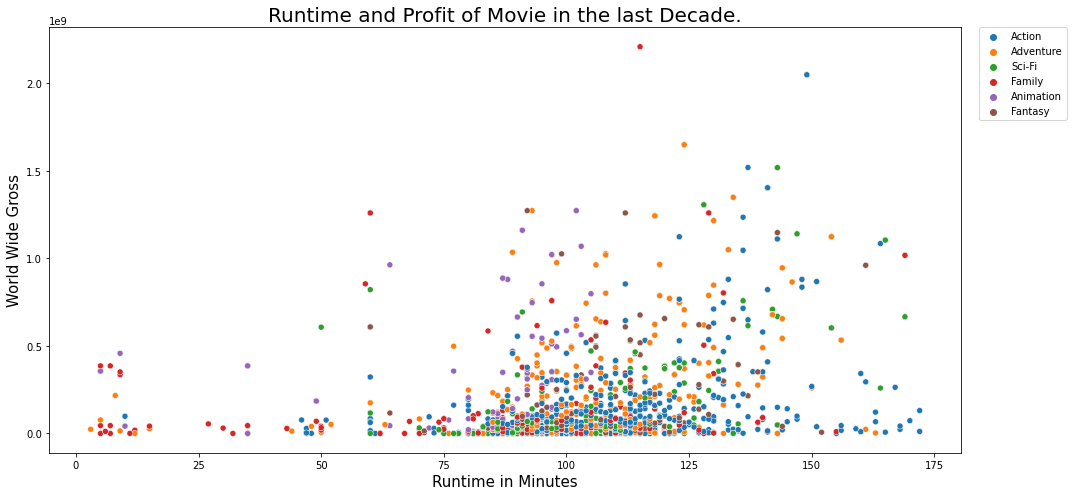

In [78]:
fig, ax = plt.subplots(figsize = (15,7))
sns.scatterplot(x='runtime_minutes',y='worldwide_gross',hue='genres', data=df, ax=ax)
ax.set_title('Runtime and Profit of Movie in the last Decade.', fontsize=20)
ax.set_xlabel('Runtime in Minutes', fontsize=15)
ax.set_ylabel('World Wide Gross', fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig.tight_layout();            
# recommod movie that, it should run from 75 to 145 mintues.

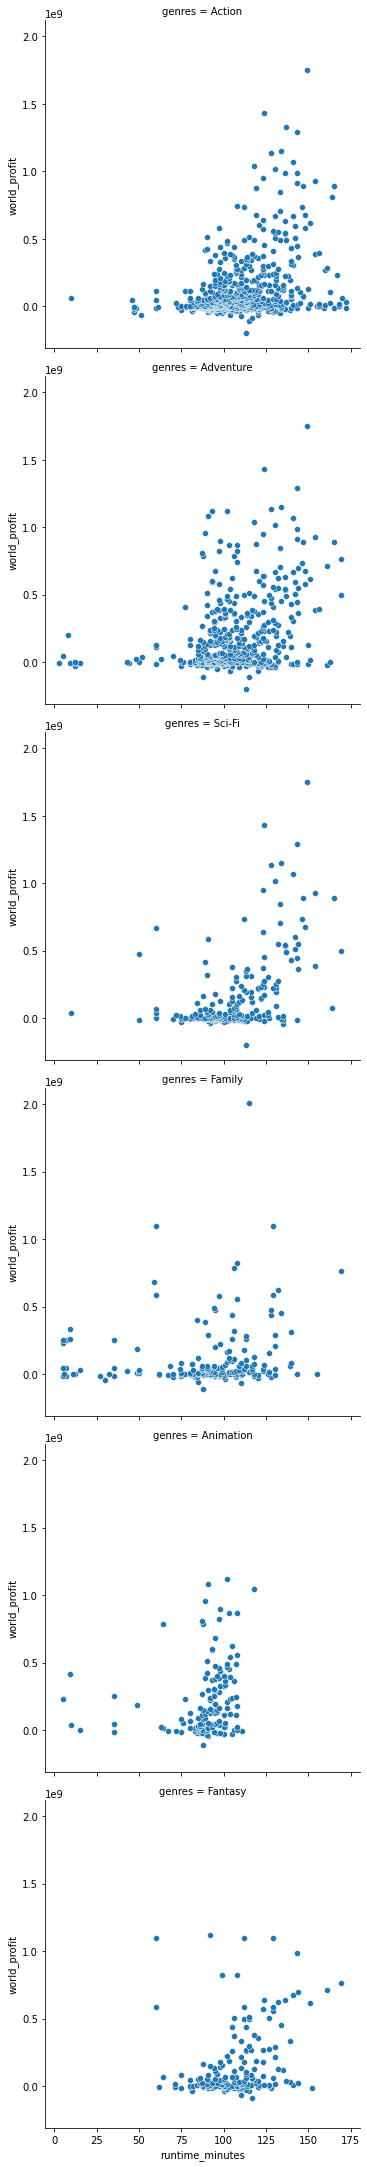

In [80]:
sns.relplot(x = 'runtime_minutes', y = 'world_profit',  row = 'genres', data = df)
plt.show()
# to show a seprate way of show the run time and profit per movie, by genres

In [105]:
df_genre_mean = round(df.groupby('genres').mean().sort_values(by='world_profit', ascending=False),3)
# grouping by the 

In [112]:
df_genre_mean.loc[:, ('runtime_minutes', 'production_budget', 'worldwide_gross', 'world_profit')]

,runtime_minutes,production_budget,worldwide_gross,world_profit
genres,,,,
Animation,89.01500,83208593.04400,309584024.68600,226375431.64200
Adventure,106.36700,88734038.60600,284518742.32000,195784703.71400
Sci-Fi,107.17000,67721530.06100,238311481.42500,170589951.36300
Fantasy,107.33200,68741245.90800,220873233.27700,152131987.37000
Action,109.32300,64847820.71100,186538758.79400,121690938.08300
Family,90.66100,48025990.72500,161485053.47100,113459062.74600
